In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy
matplotlib.rcParams['figure.figsize'] = (12, 8)

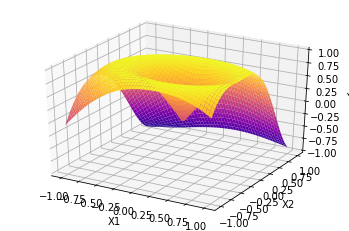

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [3]:
# %matplotlib tk

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(X1, X2, Y, cmap='plasma')
# # ax.scatter(X1, X2, Y)
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()

### Using Neural Network

In [4]:
n_hidden = 4
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [5]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5617882920167835


100 Error =  0.03915608574383513


200 Error =  0.03647479367597177


300 Error =  0.0360446172616339


400 Error =  0.03478701966419739


500 Error =  0.031137235425099198


600 Error =  0.02675536503943154


700 Error =  0.02671889657125049


800 Error =  0.026645809142915606


900 Error =  0.02649248242150551


1000 Error =  0.02626312228976085


1100 Error =  0.025996658629785754


1200 Error =  0.025596951385375957


1300 Error =  0.025098490806886264


1400 Error =  0.024798212404379655


1500 Error =  0.024677947849015513


1600 Error =  0.02464608640671287


1700 Error =  0.024634458208765638


1800 Error =  0.024633010356161243


1900 Error =  0.02463294678990261


2000 Error =  0.024632944130668518


2100 Error =  0.024632944034570635


2200 Error =  0.02463294403185627


2300 Error =  0.02463294403179761


2400 Error =  0.024632944031796663


2500 Error =  0.024632944031796656


2600 Error =  0.024632944031796652


2700 Error =  0.024632944031

TclError: invalid command name "pyimage10"

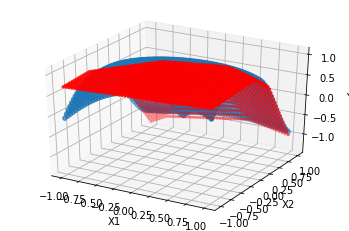

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [7]:
layer1.weights, layer1.bias

(array([[-0.8454278 ,  0.90320251,  0.00967704,  0.13318107],
        [-1.56125708, -0.92149361, -0.2008644 , -1.03374057]]),
 array([0.91305673, 0.51847773, 0.44144341, 0.28327079]))

## Factorize the layer 1 weights

In [8]:
layer1.weights.shape

(2, 4)

In [9]:
n_hidden2 = 2
optimizer = tnn.SGD()

w1_layer = tnn.WeightsLayer(2, n_hidden2, optimizer=optimizer)
w2_layer = tnn.WeightsLayer(n_hidden2, n_hidden, optimizer=optimizer)

In [10]:
for epoch in range(100000):
    wout = w2_layer.forward(w1_layer.weights)
    dw = wout - layer1.weights
    dw1 = w2_layer.backward(dw/dw.shape[1]) 
    w1_layer.del_weights = dw1
    
    w2_layer.update()
    w1_layer.update()
    
    if epoch%10000 == 0:
        error = (dw**2).mean()
        print(epoch, 'Error = ', error)

0 Error =  0.5986655058650265
10000 Error =  3.945428999345705e-09
20000 Error =  1.8009618588811125e-16
30000 Error =  8.221650440904757e-24
40000 Error =  9.537554701075809e-28
50000 Error =  9.537554701075809e-28
60000 Error =  9.537554701075809e-28
70000 Error =  9.537554701075809e-28
80000 Error =  9.537554701075809e-28
90000 Error =  9.537554701075809e-28


In [11]:
w1_layer.weights@w2_layer.weights

array([[-0.8454278 ,  0.90320251,  0.00967704,  0.13318107],
       [-1.56125708, -0.92149361, -0.2008644 , -1.03374057]])

In [12]:
layer1.weights

array([[-0.8454278 ,  0.90320251,  0.00967704,  0.13318107],
       [-1.56125708, -0.92149361, -0.2008644 , -1.03374057]])

In [13]:
layer1.output

array([[ 3.31974161,  0.53676884,  0.63263077,  1.18383029],
       [ 3.28523435,  0.57363425,  0.63302575,  1.18926625],
       [ 3.25072709,  0.61049965,  0.63342073,  1.19470221],
       ...,
       [-1.42461362,  0.42645581,  0.24946608, -0.62816063],
       [-1.45912088,  0.46332122,  0.24986106, -0.62272467],
       [-1.49362814,  0.50018663,  0.25025605, -0.6172887 ]])

In [14]:
new_out = (xx@w1_layer.weights)@w2_layer.weights + layer1.bias
new_out

array([[ 3.31974161,  0.53676884,  0.63263077,  1.18383029],
       [ 3.28523435,  0.57363425,  0.63302575,  1.18926625],
       [ 3.25072709,  0.61049965,  0.63342073,  1.19470221],
       ...,
       [-1.42461362,  0.42645581,  0.24946608, -0.62816063],
       [-1.45912088,  0.46332122,  0.24986106, -0.62272467],
       [-1.49362814,  0.50018663,  0.25025605, -0.6172887 ]])

In [15]:
layer1.output - new_out

array([[ 3.90798505e-14,  1.13242749e-14,  2.14273044e-14,
        -7.92699240e-14],
       [ 3.86357613e-14,  1.21014310e-14,  2.13162821e-14,
        -7.92699240e-14],
       [ 3.81916720e-14,  1.29896094e-14,  2.10942375e-14,
        -7.86037901e-14],
       ...,
       [-3.81916720e-14, -1.29896094e-14, -2.10387263e-14,
         7.87148124e-14],
       [-3.86357613e-14, -1.21014310e-14, -2.11497486e-14,
         7.91589017e-14],
       [-3.90798505e-14, -1.13242749e-14, -2.13162821e-14,
         7.93809463e-14]])

##### Making Neural networks with these weights and zero bias on first Layer
##### The previous second layer is now third layer

In [16]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden2,
                          weights=copy.deepcopy(w1_layer.weights),
                          optimizer=optimizer)
layer2_ = tnn.LinearLayer(n_hidden2, n_hidden,
                          weights=copy.deepcopy(w2_layer.weights),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden,1,
                          weights=copy.deepcopy(layer2.weights),
                          bias = copy.deepcopy(layer2.bias),
                          optimizer=optimizer)

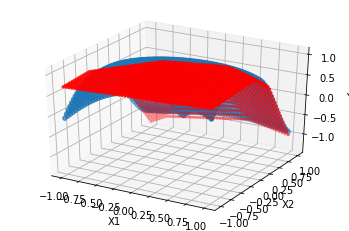

In [17]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [18]:
yout_ - yout

array([[-8.90398866e-14],
       [-8.93729535e-14],
       [-8.87068197e-14],
       ...,
       [ 4.44089210e-15],
       [ 4.66293670e-15],
       [ 4.21884749e-15]])

In [19]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is little change in error..

(0.024632944031796652, 0.024632944031796652)

#### Double Relu Layer from the Linear Layer

In [20]:
# optimizer = tnn.Adam()

# net_ = tnn.AutoForm(new_layers=True)
# layer1_ = tnn.LinearLayer(2, n_hidden,
#                           weights=copy.deepcopy(layer1.weights),
#                           bias = copy.deepcopy(layer1.bias),
#                           optimizer=optimizer)
# layer2_ = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
#                                     weights=copy.deepcopy(w2_layer.weights),
#                                     optimizer=optimizer)
# layer3_ = tnn.DoubleReluLinearLayer(n_hidden2,1,
#                                     weights=np.vstack([w3_layer.weights,w3_layer.weights]),
#                                     bias = copy.deepcopy(layer2.bias),
#                                     optimizer=optimizer)

optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden2,
                          weights=copy.deepcopy(w1_layer.weights),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                          weights=np.vstack([w2_layer.weights, w2_layer.weights]),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden,1,
                          weights=copy.deepcopy(layer2.weights),
                          bias = copy.deepcopy(layer2.bias),
                          optimizer=optimizer)

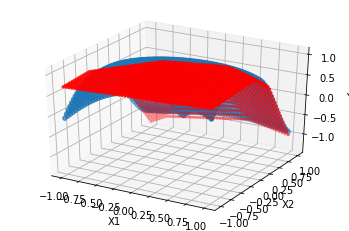

In [21]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [22]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is little change in error..

(0.024632944031796652, 0.024632944031796652)

## Adding Noise

In [23]:
# noise_old = 0.1
# noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1_.weights.shape)
# noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1_.bias.shape)

# layer1_.weights += noise_old_w1
# layer1_.bias += noise_old_b1

# noise_old_w2 = np.random.normal(loc=0, scale=noise_old, size=layer2_.weights.shape)
# noise_old_b2 = np.random.normal(loc=0, scale=noise_old, size=layer2_.bias.shape)

# layer2_.weights += noise_old_w2
# layer2_.bias += noise_old_b2

### Training the network

In [24]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy = yout_ - yy
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.024632944031796652


100 Error =  0.020689823408806696


200 Error =  0.010125407862207034


300 Error =  0.008864275866549354


400 Error =  0.008656182439483231


500 Error =  0.008601569333398151


600 Error =  0.008550879071783597


700 Error =  0.008431289635403584


800 Error =  0.008011124246669157


900 Error =  0.00630314957119127


1000 Error =  0.005851853207384863


1100 Error =  0.005782434524527522


1200 Error =  0.005719709740258395


1300 Error =  0.005634730899193143


1400 Error =  0.005584145668939592


1500 Error =  0.005498240463271748


1600 Error =  0.005380453923221936


1700 Error =  0.005359705351827229


1800 Error =  0.005342669183176537


1900 Error =  0.005331676618431688


2000 Error =  0.0053718757136764


2100 Error =  0.005336226123363906


2200 Error =  0.00534587576787668


2300 Error =  0.0053362743899099275


2400 Error =  0.005300421895211307


2500 Error =  0.005299909506749589


2600 Error =  0.005292947280633883


2700 Error =  0.

TclError: invalid command name "pyimage32"

In [25]:
layer1_.weights, layer1_.bias

(array([[ 0.66678419, -0.32627858],
        [-0.40541724, -0.89440517]]), array([-0.32793793, -0.22544948]))

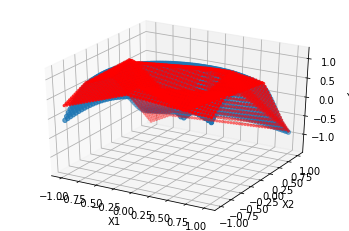

In [26]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Training the same network from scratch

In [27]:
n_hidden2, n_hidden

(2, 4)

In [28]:
optimizer = tnn.Adam()

net_0 = tnn.AutoForm(new_layers=True)
layer1_0 = tnn.LinearLayer(2, n_hidden2,
                          optimizer=optimizer)
layer2_0 = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                                    optimizer=optimizer)
layer3_0 = tnn.DoubleReluLinearLayer(n_hidden,1,
                                    optimizer=optimizer)

In [29]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_0 = net_0.forward(xx)
    dy = yout_0 - yy
    dx = net_0.backward(dy)
    
    net_0.update()
        
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_0.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7795101836288886


100 Error =  0.04126010919504068


200 Error =  0.022834330672234372


300 Error =  0.021702387670083877


400 Error =  0.020983215851605744


500 Error =  0.020419285440035222


600 Error =  0.020004961538318284


700 Error =  0.019730063893332185


800 Error =  0.01953660393411302


900 Error =  0.01939249965826558


1000 Error =  0.019253000908517594


1100 Error =  0.019084777464909


1200 Error =  0.01885945162254168


1300 Error =  0.01846853346544433


1400 Error =  0.017854770146730096


1500 Error =  0.017223141117631034


1600 Error =  0.016490169774428045


1700 Error =  0.016084306943409406


1800 Error =  0.0158431026224921


1900 Error =  0.01579548014307869


2000 Error =  0.015560217684156684


2100 Error =  0.015358765490438457


2200 Error =  0.015425577923797689


2300 Error =  0.015170890987041665


2400 Error =  0.015018245092284943


2500 Error =  0.014993639065727073


2600 Error =  0.014916773719672717


2700 Error =  0.0148740200

TclError: invalid command name "pyimage48"

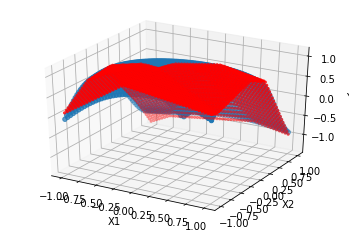

In [30]:
yout_0 = net_0.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_0.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Similar network with relu activation

In [33]:
optimizer = tnn.Adam()

net_1 = tnn.AutoForm(new_layers=True)
layer1_1 = tnn.NonLinearLayer(2, n_hidden2+1, activation=tnn.Relu(),
                          optimizer=optimizer)
layer2_1 = tnn.NonLinearLayer(n_hidden2+1, n_hidden+1, activation=tnn.Relu(),
                              optimizer=optimizer)
layer3_1 = tnn.LinearLayer(n_hidden+1,1, optimizer=optimizer)

In [ ]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_1 = net_1.forward(xx)
    dy = yout_1 - yy
    dx = net_1.backward(dy)
    
    net_1.update()
        
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_1.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7542639663769037


100 Error =  0.0443300475954496


200 Error =  0.028513129474507855


300 Error =  0.027295114669558886


400 Error =  0.026490343506855935


500 Error =  0.025728695454628508


600 Error =  0.025103911424078737


700 Error =  0.024648000453012894


800 Error =  0.02434441580574412


900 Error =  0.024164362986007208


1000 Error =  0.024052396953687667


1100 Error =  0.02396348709442333


1200 Error =  0.02387764388879851


1300 Error =  0.023787155096796853


1400 Error =  0.0236950363682196


1500 Error =  0.023595750392904687


1600 Error =  0.02350488929199377


1700 Error =  0.023418785954616873


1800 Error =  0.017839816201389195


1900 Error =  0.01397750849808896
